In [ ]:
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')

In [1]:
## load dependencie# mathmpy as np  #numeric    
import ast  # dict literal evaluation 
import re   # regular expression 
import matplotlib.pyplot as plt # data visualization
import pytesseract as pt        # Optical Character Recognition 
from pytesseract import Output  # Output format
import spacy    # name entity regognition toolkit
from spacy import displacy  # 
import en_core_web_sm   # language core 
nlp = en_core_web_sm.load()

In [2]:
## Read txt file as dict more data available (i.e., position, size and level info)
def read_dict(txt_file_path):
    
    # open file 
    txt_file = open(txt_file_path,'r')

    # read data in txt file
    txt_raw = txt_file.read()

    # read the content as dictionary 
    txt_as_dict  = ast.literal_eval(txt_raw)
    
    # close the file
    txt_file.close()
    
    return txt_as_dict

In [3]:
## Read info

#  Read text file 
class_1_yes_a = 'data/txt/A-MMED 2017 Pioneer loss runs PIO-YES0.txt'

# Read image corresponding to txt file
class_1_yes_a_image = 'data/images/A-MMED 2017 Pioneer loss runs PIO-YES0.jpg'

# Read as dict format
txt_dict = read_dict(class_1_yes_a)

In [4]:
# load rules
from configobj import ConfigObj

# load configuration file
template_rules = ConfigObj('config_file.ino')

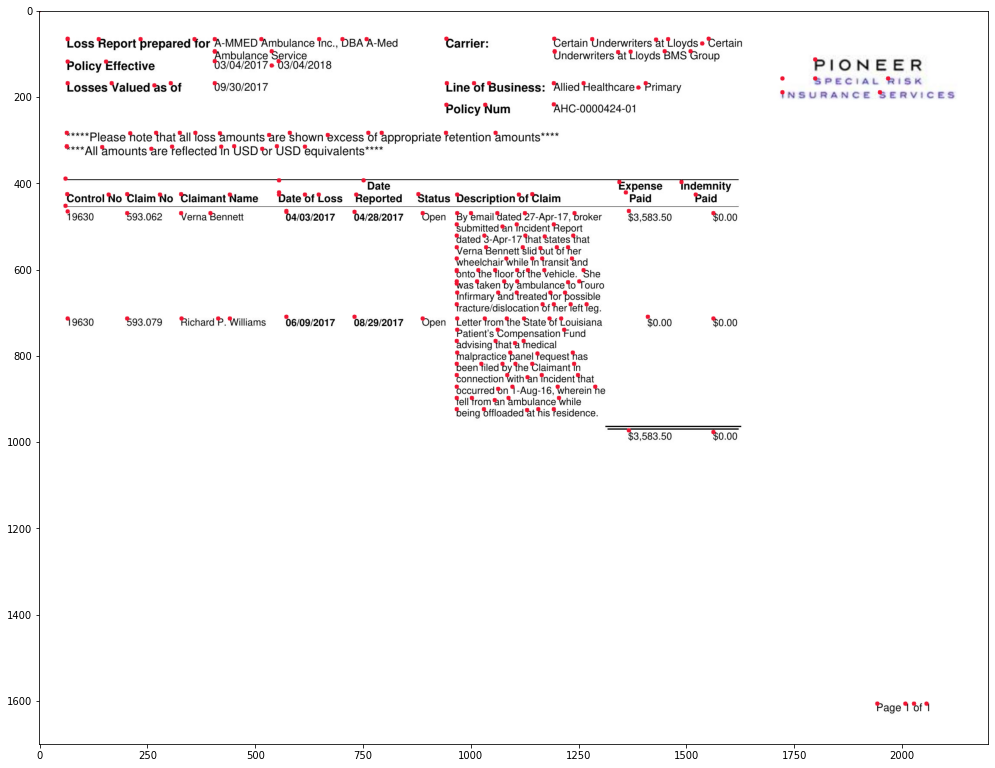

In [5]:
# Extract the sentenses in order to check if the data points are in the text
#
import cv2

# create an all text string
sentences = ' '.join(txt_dict['text']).upper()

# read report image
image_all = cv2.imread(class_1_yes_a_image)

# chek 
for key, item in enumerate(template_rules):

    # Check if data point is in text    
    for i in template_rules[item]:
        if i in sentences:
            for line in range(len(txt_dict['text'])):

                if i in sentences.upper():

                    # draw each word 
                    cv2.circle(image_all, (txt_dict['left'][line], txt_dict['top'][line]),5,(240,20,50),-1)

plt.figure(figsize=(17,30))
plt.imshow(image_all)


In [6]:
## Map the dictionary to string transform

# get subjets in ocr result
import numpy as np
elements = len(txt_dict['text'])
x = np.zeros(shape= (elements,1),dtype = int)
y = np.zeros(shape= (elements,1), dtype = int)
pos = []
string_result = ''
for i in range (elements):
    string_result+= txt_dict['text'][i] + ' '
    pos.append(len(string_result))
    x[i] = txt_dict['left'][i]
    y[i] = txt_dict['top'][i]



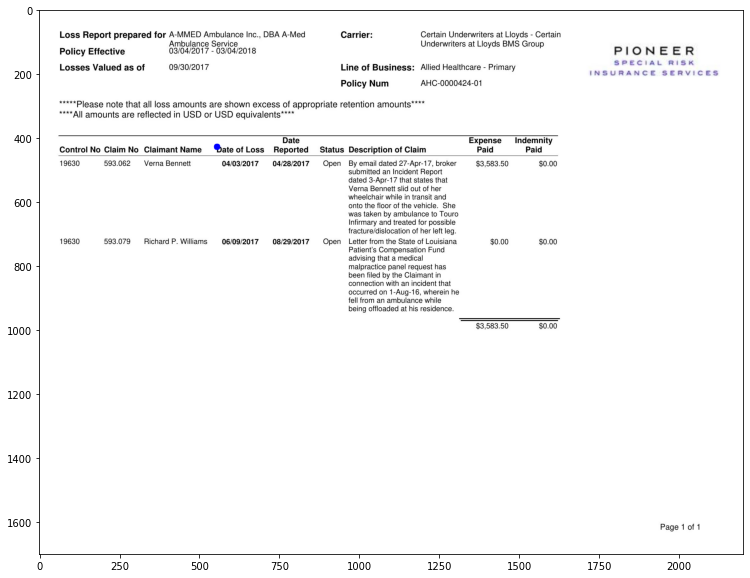

In [8]:
## TEST CELL, IGNORE IT

# laod image 
_image = cv2.imread(class_1_yes_a_image)

# text to search
data_point = template_rules['loss date'][0]

# find text coords
_index = pos.index(sentences.index(data_point)) + 1

# x , y choords search
x = txt_dict['left'][_index] 
y = txt_dict['top'][_index]

plt.figure(figsize=(14,10))
plt.imshow(cv2.circle(_image,(x,y),10,(0,0,255),-1))

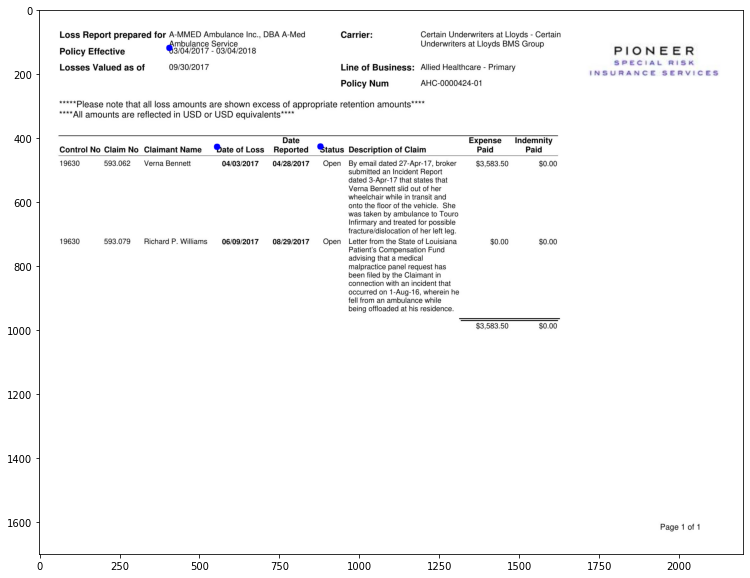

In [24]:
## filter the data points in text

for _,key in enumerate(template_rules):
    for i in range(len(template_rules[key])):
       
        data_point = template_rules[key][i]
        # find text coords
        try:
            _index = pos.index(sentences.index(data_point)) + 1
            # x , y 
            x = txt_dict['left'][_index] 
            y = txt_dict['top'][_index]
            
        except:
            pass 
            
plt.figure(figsize=(14,10))        
plt.imshow(cv2.circle(_image,(x,y),10,(0,0,255),-1))
plt.show()

In [25]:
## Tokenize sentces
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentences)
_token = []
for ent in doc.ents:
    _token +=[(ent.text,ent.label_)]
_token
_listX = [0,0]
_listY = [0,0]
_Min_distance = [0,0]
data_point = template_rules['loss date'][0]
_index = pos.index(sentences.index(data_point)) + 1
_listX[0] = (txt_dict['left'][_index])
_listY[0] = (txt_dict['top'][_index])


#for i in range (len(_token)):
#_index = pos.index(sentences.index(data_point)) + 1
#x = txt_dict['left'][_index] 
#y = txt_dict['top'][_index]

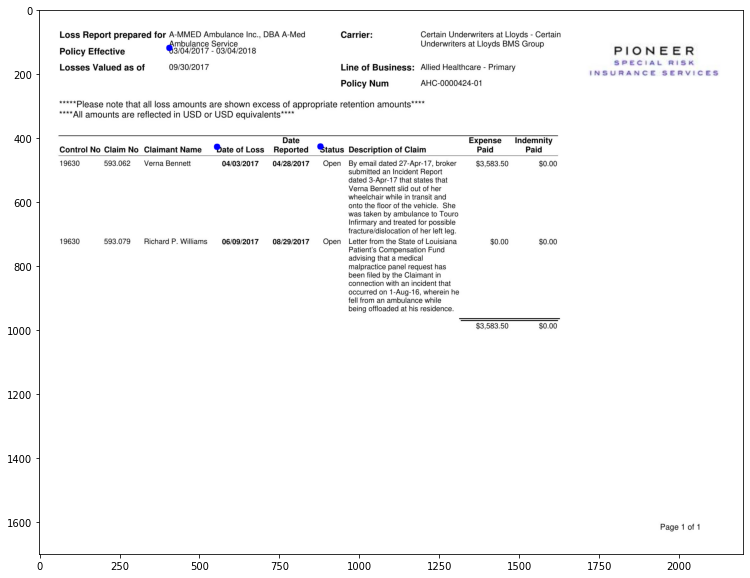

In [26]:
_aux=100000000
for i in range (len(_token)):
    if 'DATE' in _token[i]:
        _index_tuple = pos.index(sentences.index(_token[i][0]))
        _listX[1] = (txt_dict['left'][_index_tuple])
        _listY[1] = (txt_dict['top'][_index_tuple])
        _aux1 = ((_listX[0]-_listX[1])**2 + (_listY[0] - _listY[1])**2)**.5
        if _aux1 < _aux:
            _aux = _aux1
            _Min_distance= [_listX[1], _listY[1]]

plt.figure(figsize=(14,10))
plt.imshow(cv2.circle(_image,(_Min_distance[0],_Min_distance[1]),10,(0,0,255),-1))